In [66]:
import numpy as np
import matplotlib.pyplot as plt
import time
import copy
from tqdm import tqdm
print(np.__version__)

1.20.3


In [50]:
def show_v_table_small(v_table, env):
    for i in range(env.reward.shape[0]):        
        print("+----------"*env.reward.shape[1])
        print("|", end="")
        for j in range(env.reward.shape[1]):
            print("{0:8.2f}  |".format(v_table[i,j]),end="")
        print()
    print("+----------"*env.reward.shape[1])

# V table 그리기    
def show_v_table(v_table, env):    
    for i in range(env.reward.shape[0]):        
        print("+-----------------"*env.reward.shape[1],end="")
        print("+")
        for k in range(3):
            print("|",end="")
            for j in range(env.reward.shape[1]):
                if k==0:
                    print("                 |",end="")
                if k==1:
                        print("   {0:8.2f}      |".format(v_table[i,j]),end="")
                if k==2:
                    print("                 |",end="")
            print()
    print("+-----------------"*env.reward.shape[1],end="")
    print("+")
    
# Q table 그리기
def show_q_table(q_table,env):
    for i in range(env.reward.shape[0]):
        print("+-----------------"*env.reward.shape[1],end="")
        print("+")
        for k in range(3):
            print("|",end="")
            for j in range(env.reward.shape[1]):
                if k==0:
                    print("{0:10.2f}       |".format(q_table[i,j,0]),end="")
                if k==1:
                    print("{0:6.2f}    {1:6.2f} |".format(q_table[i,j,3],q_table[i,j,1]),end="")
                if k==2:
                    print("{0:10.2f}       |".format(q_table[i,j,2]),end="")
            print()
    print("+-----------------"*env.reward.shape[1],end="")
    print("+")
    

# 정책 policy 화살표로 그리기
def show_q_table_arrow(q_table,env):
    for i in range(env.reward.shape[0]):        
        print("+-----------------"*env.reward.shape[1],end="")
        print("+")
        for k in range(3):
            print("|",end="")
            for j in range(env.reward.shape[1]):
                if k==0:
                    if np.max(q[i,j,:]) == q[i,j,0]:
                        print("        ↑        |",end="")
                    else:
                        print("                 |",end="")
                if k==1:                    
                    if np.max(q[i,j,:]) == q[i,j,1] and np.max(q[i,j,:]) == q[i,j,3]:
                        print("      ←  →       |",end="")
                    elif np.max(q[i,j,:]) == q[i,j,1]:
                        print("           →     |",end="")
                    elif np.max(q[i,j,:]) == q[i,j,3]:
                        print("      ←          |",end="")
                    else:
                        print("                 |",end="")
                if k==2:
                    if np.max(q[i,j,:]) == q[i,j,2]:
                        print("        ↓        |",end="")
                    else:
                        print("                 |",end="")
            print()
    print("+-----------------"*env.reward.shape[1],end="")
    print("+")    
    
# 정책 policy 화살표로 그리기
def show_policy_small(policy,env):
    for i in range(env.reward.shape[0]):        
        print("+----------"*env.reward.shape[1],end="")
        print("+")
        print("|", end="")
        for j in range(env.reward.shape[1]):
            if env.reward_list1[i][j] == "road":
                if policy[i,j] == 0:
                    print("   ↑      |",end="")
                elif policy[i,j] == 1:
                    print("    →     |",end="")
                elif policy[i,j] == 2:
                    print("    ↓     |",end="")
                elif policy[i,j] == 3:
                    print("   ←      |",end="")
            else:
                print("          |",end="")
        print()
    print("+----------"*env.reward.shape[1],end="")
    print("+")
    
# 정책 policy 화살표로 그리기
def show_policy(policy,env):
    for i in range(env.reward.shape[0]):        
        print("+-----------------"*env.reward.shape[1],end="")
        print("+")
        for k in range(3):
            print("|",end="")
            for j in range(env.reward.shape[1]):
                if k==0:
                    print("                 |",end="")
                if k==1:
                    if policy[i,j] == 0:
                        print("       ↑         |",end="")
                    elif policy[i,j] == 1:
                        print("       →         |",end="")
                    elif policy[i,j] == 2:
                        print("       ↓         |",end="")
                    elif policy[i,j] == 3:
                        print("       ←         |",end="")
                if k==2:
                    print("                 |",end="")
            print()
    print("+-----------------"*env.reward.shape[1],end="")
    print("+")

In [51]:
class Agent:
    action = np.array([[-1, 0], [0, 1], [1, 0], [0, -1]])
    select_action_pr = np.array([0.25, 0.25, 0.25, 0.25])
    pos = np.array([0, 0])

    def set_pos(self, position):
        self.pos = position
        return self.pos
    
    def get_pos(self):
        return self.pos

In [52]:
class Environment:
    cliff = -3
    road = -1
    goal = 1

    goal_position = [2, 2]

    reward_list = [[road, road, road],
                   [road, road, road], 
                   [road, road, goal]]
    
    reward_list1 = [["road", "road", "road"],
                    ["road", "road", "road"],
                    ["road", "road", "goal"]]
    
    def __init__(self):
        self.reward = np.asarray(self.reward_list)

    def move(self, agent:Agent, action):
        done = False
        new_pos = agent.pos + agent.action[action]

        if self.reward_list1[agent.pos[0]][agent.pos[1]] == "goal":
            reward = self.goal
            observation = agent.set_pos(agent.pos)
            done = True

        elif not(new_pos[0] in range(0, 3)) or not(new_pos[1] in range(0, 3)):
            reward = self.cliff
            observation = agent.set_pos(agent.pos)
            done = True
        
        else:
            observation = agent.set_pos(new_pos)
            reward = self.reward[observation[0], observation[1]]

        return observation, reward, done
            



In [53]:
def state_value_function(env:Environment, agent:Agent, G, max_step, now_step):
    gamma = 0.9

    if env.reward_list1[agent.pos[0]][ agent.pos[1]] == "goal":
        return env.goal
    if max_step == now_step:
        pos1 = agent.get_pos()
        for i in range(len(agent.action)):
            agent.set_pos(pos1)
            observation, reward, done = env.move(agent, i)
            G += agent.select_action_pr[i] * reward
        return G
    else:
        pos1 = agent.get_pos()
        for i in range(len(agent.action)):
            observation, reward, done = env.move(agent, i)
            G+= agent.select_action_pr[i]*reward

            if done == True:
                if not(observation[0] in range(0, 3)) or not(observation[1] in range(0, 3)):
                    agent.set_pos(pos1)
            
            next_v = state_value_function(env, agent, 0, max_step, now_step+1)
            G+= agent.select_action_pr[i]*gamma*next_v

            agent.set_pos(pos1)

        return G





[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
max_step_number = 0 total_time = 0.0(s)
+-----------------+-----------------+-----------------+
|                 |                 |                 |
|      -2.00      |      -1.50      |      -2.00      |
|                 |                 |                 |
+-----------------+-----------------+-----------------+
|                 |                 |                 |
|      -1.50      |      -1.00      |      -1.00      |
|                 |                 |                 |
+-----------------+-----------------+-----------------+
|                 |                 |                 |
|      -2.00      |      -1.00      |       1.00      |
|                 |                 |                 |
+-----------------+-----------------+-----------------+
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
max_step_number = 1 total_time = 0.0(s)
+-----------------+-----------------+-----------------+
|                 |                 |                 |
|     

No handles with labels found to put in legend.


max_step_number = 7 total_time = 3.02(s)
+-----------------+-----------------+-----------------+
|                 |                 |                 |
|      -9.40      |      -8.28      |      -8.20      |
|                 |                 |                 |
+-----------------+-----------------+-----------------+
|                 |                 |                 |
|      -8.28      |      -6.49      |      -4.87      |
|                 |                 |                 |
+-----------------+-----------------+-----------------+
|                 |                 |                 |
|      -8.20      |      -4.87      |       1.00      |
|                 |                 |                 |
+-----------------+-----------------+-----------------+


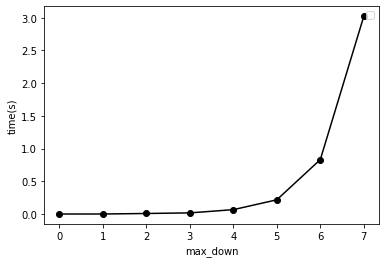

In [54]:
env = Environment()
agent = Agent()
max_step_number = 8
time_len = []
for max_step in range(max_step_number):
    v_table = np.zeros((env.reward.shape[0], env.reward.shape[1]))
    start_time = time.time()
    print(v_table)

    for i in range(env.reward.shape[0]):
        for j in range(env.reward.shape[1]):
            agent.set_pos([i, j])
            v_table[i, j] = state_value_function(env, agent, 0, max_step, 0)

    time_len.append(time.time()-start_time)
    print("max_step_number = {} total_time = {}(s)".format(max_step, np.round(time.time()-start_time, 2)))

    show_v_table(np.round(v_table, 2),env)

plt.plot(time_len, 'o-k')
plt.xlabel('max_down')
plt.ylabel('time(s)')
plt.legend()
plt.show()


In [55]:
def action_value_function(env:Environment, agent:Agent, act, G, max_step, now_step):
    gamma = 0.9
    
    if env.reward_list1[agent.pos[0]][agent.pos[1]] == "goal":
        return env.goal
    if max_step == now_step:
        observation, reward, done = env.move(agent, act)
        G +=agent.select_action_pr[act]*reward
        return G
    else:
        pos1 = agent.get_pos() # 현재 상태 저장
        observation,reward, done = env.move(agent, act)
        G +=agent.select_action_pr[act]*reward
        
        if done == True: 
            if not(0<=observation[0]<3 and 0<=observation[1]<3): #절벽에 떨어졌을 경우
                agent.set_pos(pos1)
                
        pos1 = agent.get_pos()
        
        for i in range(len(agent.action)):
            agent.set_pos(pos1)
            next_v = action_value_function(env, agent, i, 0, max_step, now_step+1)
            G+= agent.select_action_pr[i]*gamma*next_v
        return G

In [56]:
# 재귀적으로 행동의 가치를 계산

# 1. 환경 초기화
env = Environment()

# 2. 에이전트 초기화
agent = Agent()
np.random.seed(0)

# 3. 현재부터 max_step 까지 계산
max_step_number = 8

# 4. 모든 상태에 대해
for max_step in range(max_step_number):
    # 4.1 미로 상의 모든 상태에서 가능한 행동의 가치를 저장할 테이블을 정의
    print("max_step = {}".format(max_step))
    q_table = np.zeros((env.reward.shape[0], env.reward.shape[1],len(agent.action)))
    for i in range(env.reward.shape[0]):
        for j in range(env.reward.shape[1]):
            # 4.2 모든 행동에 대해
            for action in range(len(agent.action)):
                # 4.2.1 에이전트의 위치를 초기화
                agent.set_pos([i,j])
                # 4.2.2 현재 위치에서 행동 가치를 계산
                q_table[i ,j,action] = action_value_function(env, agent, action, 0, max_step, 0)

    q = np.round(q_table,2)
    print("Q - table")
    show_q_table(q, env)
    print("High actions Arrow")
    show_q_table_arrow(q,env)
    print()

max_step = 0
Q - table
+-----------------+-----------------+-----------------+
|     -0.75       |     -0.75       |     -0.75       |
| -0.75     -0.25 | -0.25     -0.25 | -0.25     -0.75 |
|     -0.25       |     -0.25       |     -0.25       |
+-----------------+-----------------+-----------------+
|     -0.25       |     -0.25       |     -0.25       |
| -0.75     -0.25 | -0.25     -0.25 | -0.25     -0.75 |
|     -0.25       |     -0.25       |      0.25       |
+-----------------+-----------------+-----------------+
|     -0.25       |     -0.25       |      1.00       |
| -0.75     -0.25 | -0.25      0.25 |  1.00      1.00 |
|     -0.75       |     -0.75       |      1.00       |
+-----------------+-----------------+-----------------+
High actions Arrow
+-----------------+-----------------+-----------------+
|                 |                 |                 |
|           →     |      ←  →       |      ←          |
|        ↓        |        ↓        |        ↓        |
+-----

In [57]:
np.random.seed(0)
env = Environment()
agent = Agent()
gamma = 0.9

v_table = np.zeros((env.reward.shape[0], env.reward.shape[1]))
k = 1

while(True):
    delta = 0
    
    temp_v = copy.deepcopy(v_table)
    
    for i in range(3):
        for j in range(3):
            G = 0
            
            for action in range(4):
                agent.set_pos([i, j])
                observation, reward, done = env.move(agent, action)
                
                G += agent.select_action_pr[action]*(reward + gamma * v_table[observation[0], observation[1]])
                
            v_table[i, j] = G
                
    delta = np.max(np.abs(temp_v-v_table))

    k+=1
    if delta<0.000001:
        break


In [58]:
def policy_evaluation(env, agent, v_table, policy):
    gamma = 0.9

    v_table = np.zeros((env.reward.shape[0], env.reward.shape[1]))
    k = 1

    while(True):
        delta = 0

        temp_v = copy.deepcopy(v_table)

        for i in range(3):
            for j in range(3):
                agent.set_pos([i, j])
                action = policy[i, j]
                observation, reward, done = env.move(agent, action)
                v_table[i, j] = reward + gamma * v_table[observation[0], observation[1]]

        delta = np.max(np.abs(temp_v-v_table))
        k+=1
        if delta<0.000001:
            break
    return v_table, delta

In [59]:
def policy_improvement(env, agent, v_table, policy):
    policyStable = True
    
    for i in range(3):
        for j in range(3):
            old_action = policy[i, j]
            
            temp_action = 0
            temp_value = -1e+10
            for action in range(4):
                agent.set_pos([i, j])
                observation, reward, done = env.move(agent,action)
                if temp_value <reward + gamma * v_table[observation[0], observation[1]]:
                    temp_action = action
                    temp_value = reward + gamma*v_table[observation[0], observation[1]]
            if old_action != temp_action:
                policyStable = False
            policy[i, j] = temp_action
    return policy, policyStable

In [60]:
np.random.seed(0)
env = Environment()
agent = Agent()

v_table = np.random.rand(env.reward.shape[0], env.reward.shape[1])
policy = np.random.randint(0, 4, (env.reward.shape[0], env.reward.shape[1]))

max_iter_number = 20000
for iter_number in range(max_iter_number):
    
    v_table, delta = policy_evaluation(env, agent, v_table, policy)
    
    policy, policyStable = policy_improvement(env, agent, v_table, policy)
    
    if(policyStable == True):
        break
    k+=1
print("total_time = {}".format(time.time() - start_time))


total_time = 7.998910665512085


In [61]:
def finding_optimal_value(env, agent, v_table):
    k = 0
    gamma = 0.9
    while(True):
        delta = 0
        temp_v = copy.deepcopy(v_table)

        for i in range(env.reward.shape[0]):
            for j in range(env.reward.shape[1]):
                temp = -1e+10

                for action in range(len(agent.action)):
                    agent.set_pos([i, j])
                    observation, reward, done = env.move(agent, action)

                    if temp < reward + gamma*v_table[observation[0], observation[1]]:
                        temp = reward + gamma*v_table[observation[0], observation[1]]
                v_table[i, j] = temp
        delta = np.max([delta, np.max(np.abs(temp_v-v_table))])

        if delta < 0.0000001:
            break
        k += 1
        return v_table




In [62]:
def policy_extraction(env:Environment, agent:Agent, v_table, optimal_policy):
    for i in range(env.reward.shape[0]):
        for j in range(env.reward.shape[1]):
            temp = -1e+10

            for action in range(len(agent.action)):
                agent.set_pos([i, j])
                observation, reward, done = env.move(agent, action)
                if temp<reward + gamma * v_table[observation[0], observation[1]]:
                    optimal_policy[i, j] = action
                    temp = reward + gamma * v_table[observation[0], observation[1]]
    return optimal_policy


In [63]:
np.random.seed(0)
env = Environment()
agent = Agent()

v_table = np.random.rand(env.reward.shape[0], env.reward.shape[1])

optimal_policy = np.zeros((env.reward.shape[0], env.reward.shape[1]))
print("start Value iteration")
v_table = finding_optimal_value(env, agent, v_table)
optimal_policy = policy_extraction(env, agent, v_table, optimal_policy)
print("optimal policy")
show_policy(optimal_policy, env)


start Value iteration
optimal policy
+-----------------+-----------------+-----------------+
|                 |                 |                 |
|       →         |       ↓         |       ↓         |
|                 |                 |                 |
+-----------------+-----------------+-----------------+
|                 |                 |                 |
|       →         |       →         |       ↓         |
|                 |                 |                 |
+-----------------+-----------------+-----------------+
|                 |                 |                 |
|       →         |       →         |       ↑         |
|                 |                 |                 |
+-----------------+-----------------+-----------------+


In [68]:
def generate_episode(env:Environment, agent:Agent, first_visit):
    gamma = 0.09

    episode = []

    visit = np.zeros((env.reward.shape[0], env.reward.shape[1]))
    i = np.random.randint(0, env.reward.shape[0])
    j = np.random.randint(0, env.reward.shape[1])
    agent.set_pos([i, j])

    G = 0

    step = 0
    max_step = 100

    for k in range(max_step):
        pos = agent.get_pos()
        action = np.random.randint(0, len(agent.action))
        observation, reward, done = env.move(agent, action)
        if first_visit:
            if visit[pos[0], pos[1]] == 0:
                G += gamma**(step) * reward
                visit[pos[0], pos[1]] = 1
                step +=1
                episode.append((pos, action, reward))
        else:
            G += gamma ** (step) * reward
            step += 1
            episode.append((pos, action, reward))

        if done == True:
            break

    return i, j, G, episode

In [69]:
np.random.seed(0)
env = Environment()
agent = Agent()

v_table = np.zeros((3, 3))
v_start = np.zeros((3, 3))
v_success = np.zeros((3, 3))

Return_s = [[[] for j in range(3)] for i in range(3)]

max_episode = 100000

first_visit = False
if first_visit:
    print("start first visit MC")
else:
    print("start every visit MC")
print()

for epi in tqdm(range(max_episode)):
    i, j, G, episode = generate_episode(env, agent, first_visit)
    Return_s[i][j].append(G)

    episode_count = len(Return_s[i][j])

    total_G = np.sum(Return_s[i][j])

    v_table[i, j] = total_G / episode_count

    if episode[-1][2] == 1:
        v_success[i, j] += 1
for i in range(3):
    for j in range(3):
        v_start[i, j] = len(Return_s[i][j])

print("V(s)")
show_v_table(np.round(v_table, 2), env)
print("V_start_count(s)")
show_v_table(np.round(v_start, 2), env)
print("V_success_pr(s)")
show_v_table(np.round(v_success/v_start, 2), env)

start every visit MC



100%|██████████| 100000/100000 [00:49<00:00, 2022.23it/s]

V(s)
+-----------------+-----------------+-----------------+
|                 |                 |                 |
|      -2.07      |      -1.62      |      -2.06      |
|                 |                 |                 |
+-----------------+-----------------+-----------------+
|                 |                 |                 |
|      -1.62      |      -1.12      |      -1.06      |
|                 |                 |                 |
+-----------------+-----------------+-----------------+
|                 |                 |                 |
|      -2.05      |      -1.05      |       1.00      |
|                 |                 |                 |
+-----------------+-----------------+-----------------+
V_start_count(s)
+-----------------+-----------------+-----------------+
|                 |                 |                 |
|   11302.00      |   11148.00      |   11021.00      |
|                 |                 |                 |
+-----------------+-------